<a href="https://colab.research.google.com/github/Chii2401344/BCS102_Assignment/blob/main/BCS102_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0.0   Setting Up The Environment**

In [584]:
# Import dependencies
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [585]:
# Mount Google Drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [586]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/HELP DEGREE/SEM2/BCS102 AI FUNDAMENTALS/ASSIGNMENT/healthcare-dataset-stroke-data.csv")

# Preview the first 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **1.0   Data Exploration**

In [587]:
# Check dataset dimensions
print("Dataset Dimensions: ", df.shape)

Dataset Dimensions:  (5110, 12)


In [588]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [589]:
# Describe numerical data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [590]:
# Check for sum of null values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [591]:
# Check for number of duplicate values
df.duplicated().sum()

np.int64(0)

In [592]:
# Renaming "Residence_type" for consistency
df.rename(columns={"Residence_type": "residence_type"}, inplace=True)

# Drop ID column, since it is a unique identifier and irrelevant for training
df.drop(columns='id', inplace=True)

print ("Updated Features: " , df.columns.tolist())

Updated Features:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [593]:
# Drop entries with null BMI
df.dropna(inplace=True)
# Check updated dataset dimensions
print("Updated Dimensions: ", df.shape)

Updated Dimensions:  (4909, 11)


In [594]:
# Checking unique values in each column
print(df.nunique())

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [595]:
# Checking count of unique values in the Gender column
print(df['gender'].value_counts())

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64


In [596]:
# Drop entries with "Other" Gender, since it is statistically insignificant
df = df[df['gender'] != 'Other']
# Check updated dataset dimensions
print("Updated Dimensions: ", df.shape)

Updated Dimensions:  (4908, 11)


In [597]:
# Checking count of unique values in the Stroke column
print(df['stroke'].value_counts())

stroke
0    4699
1     209
Name: count, dtype: int64


# **2.0	Data Visualization**

In [598]:
# Set visual theme
sns.set(style="whitegrid")
stroke_palette = {0: "skyblue", 1: "salmon"}

**Target Variable Distribution**

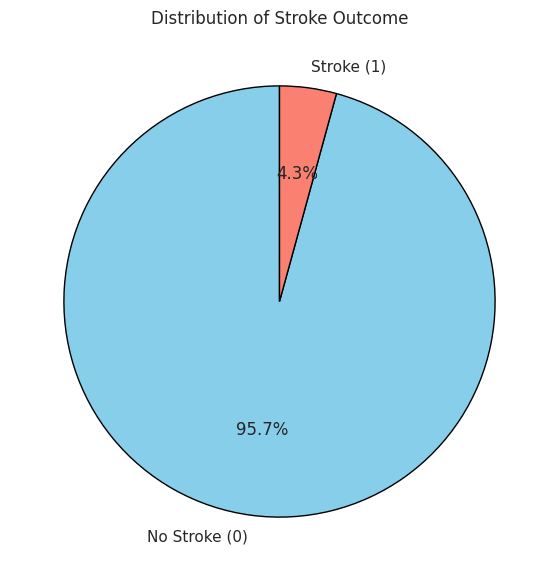

In [599]:
# Count the stroke outcomes
stroke_counts = df['stroke'].value_counts()
labels = ['No Stroke (0)', 'Stroke (1)']
colors = ['skyblue', 'salmon']

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Stroke Outcome')
plt.show()

**Feature Distributions**

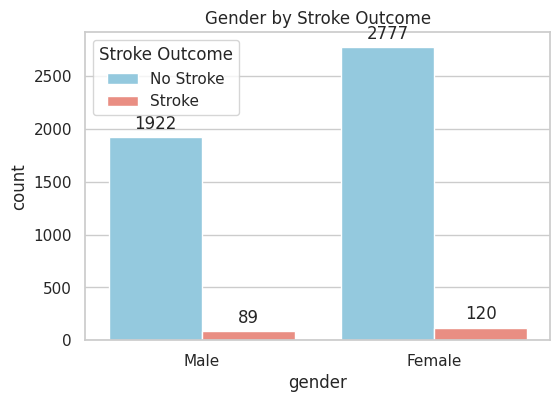

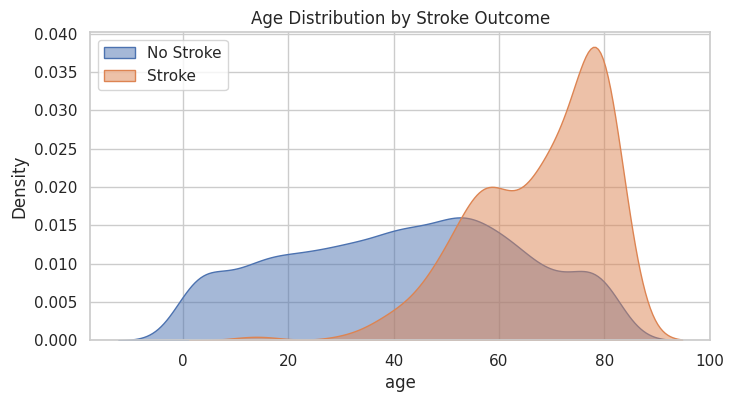

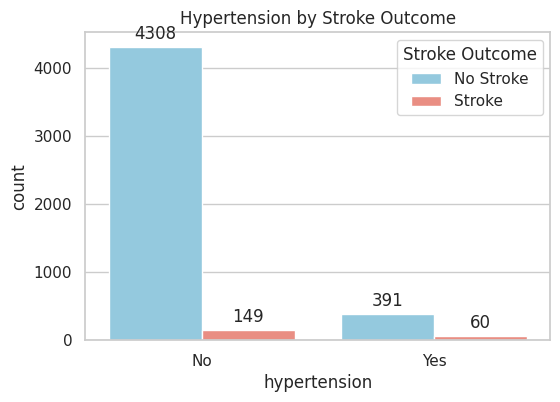

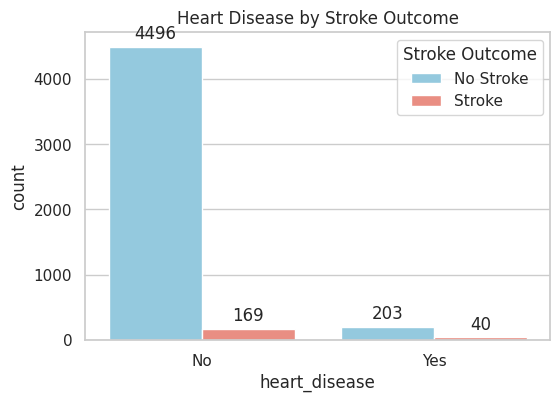

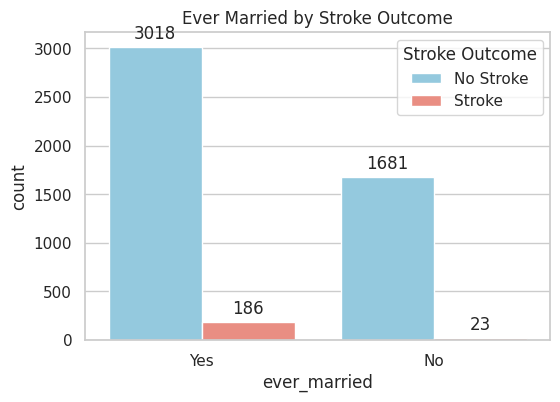

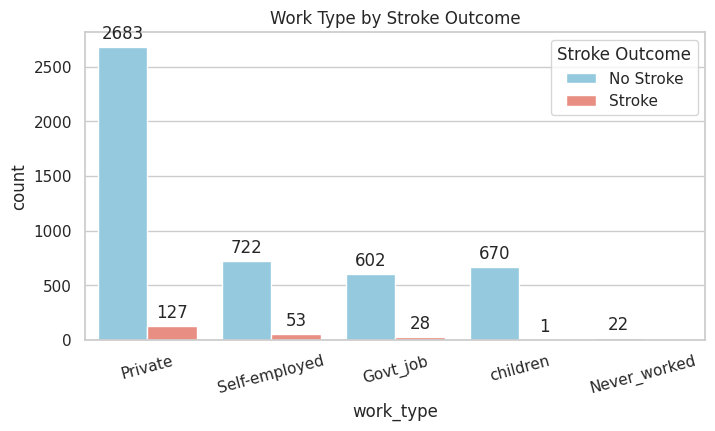

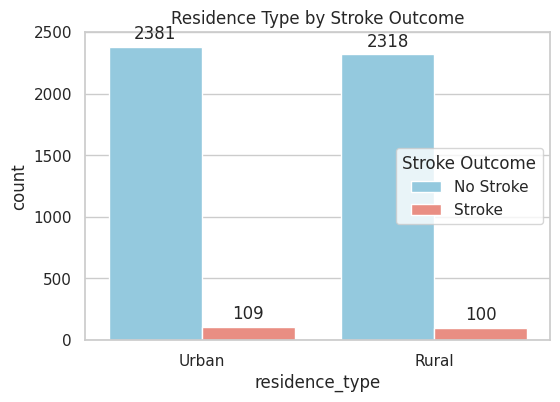

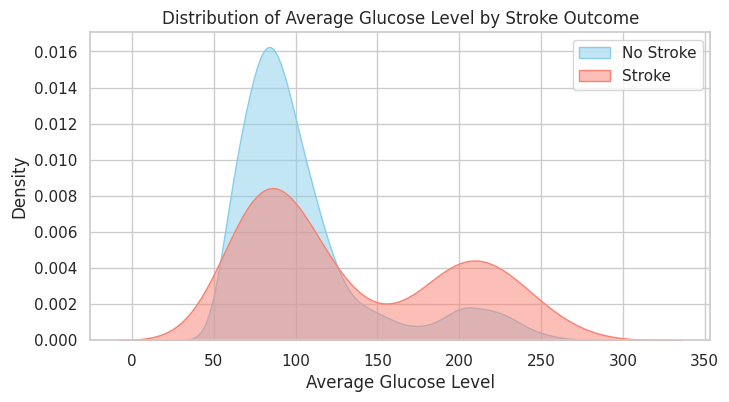

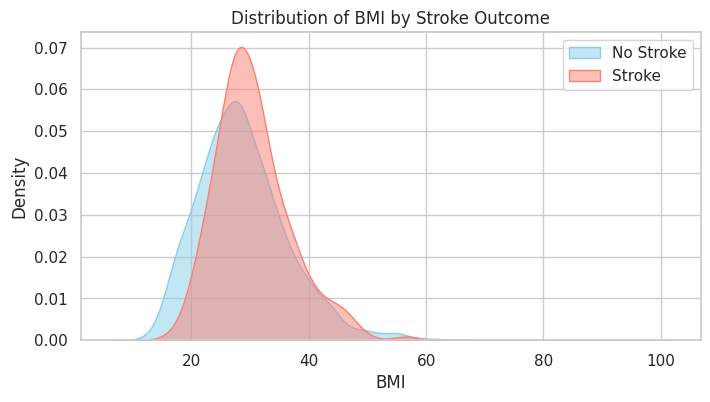

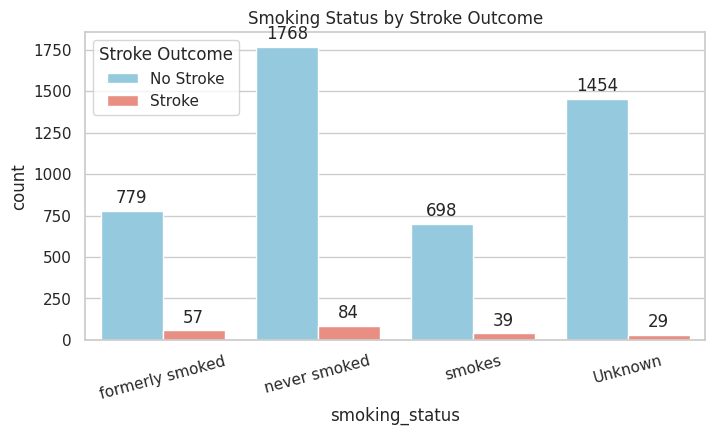

In [600]:
# 1. Gender by Stroke Outcome
plt.figure(figsize=(6,4))
gender_viz = sns.countplot(x="gender", hue="stroke", data=df, palette=stroke_palette)
plt.title("Gender by Stroke Outcome")
# Add count labels on each bar
for container in gender_viz.containers:
    gender_viz.bar_label(container, padding=3)
# Update legend to be human-readable
handles, labels = gender_viz.get_legend_handles_labels()
gender_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 2. Age Distribution by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', label='No Stroke', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['stroke'] == 1], x='age', label='Stroke', fill=True, alpha=0.5)
plt.title("Age Distribution by Stroke Outcome")
plt.legend()
plt.show()

# 3. Hypertension by Stroke Outcome
plt.figure(figsize=(6,4))
hyper_viz = sns.countplot(x="hypertension", hue="stroke", data=df, palette=stroke_palette)
plt.title("Hypertension by Stroke Outcome")
# Add count labels on each bar
for container in hyper_viz.containers:
    hyper_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = hyper_viz.get_legend_handles_labels()
hyper_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

# 4. Heart Disease by Stroke Outcome
plt.figure(figsize=(6,4))
heart_viz = sns.countplot(x="heart_disease", hue="stroke", data=df, palette=stroke_palette)
plt.title("Heart Disease by Stroke Outcome")
# Add count labels on each bar
for container in heart_viz.containers:
    heart_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = heart_viz.get_legend_handles_labels()
heart_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

# 5. Ever Married by Stroke Outcome
plt.figure(figsize=(6,4))
married_viz = sns.countplot(x="ever_married", hue="stroke", data=df, palette=stroke_palette)
plt.title("Ever Married by Stroke Outcome")
# Add count labels on each bar
for container in married_viz.containers:
    married_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = married_viz.get_legend_handles_labels()
married_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 6. Work Type by Stroke Outcome
plt.figure(figsize=(8,4))
work_viz = sns.countplot(x="work_type", hue="stroke", data=df, palette=stroke_palette)
plt.title("Work Type by Stroke Outcome")
# Add count labels on each bar
for container in work_viz.containers:
    work_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = work_viz.get_legend_handles_labels()
work_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(rotation=15)
plt.show()

# 7. Residence Type by Stroke Outcome
plt.figure(figsize=(6,4))
res_viz = sns.countplot(x="residence_type", hue="stroke", data=df, palette=stroke_palette)
plt.title("Residence Type by Stroke Outcome")
# Add count labels on each bar
for container in res_viz.containers:
    res_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = res_viz.get_legend_handles_labels()
res_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 8. Distribution of Avg Glucose Level by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', label='No Stroke', fill=True, alpha=0.5, color='skyblue')
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', label='Stroke', fill=True, alpha=0.5, color='salmon')
plt.title("Distribution of Average Glucose Level by Stroke Outcome")
plt.xlabel("Average Glucose Level")
plt.legend()
plt.show()

# 9. Distribution of BMI by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='bmi', label='No Stroke', fill=True, alpha=0.5, color='skyblue')
sns.kdeplot(data=df[df['stroke'] == 1], x='bmi', label='Stroke', fill=True, alpha=0.5, color='salmon')
plt.title("Distribution of BMI by Stroke Outcome")
plt.xlabel("BMI")
plt.legend()
plt.show()

# 10. Smoking Status by Stroke Outcome
plt.figure(figsize=(8,4))
smoke_viz = sns.countplot(x="smoking_status", hue="stroke", data=df, palette=stroke_palette)
plt.title("Smoking Status by Stroke Outcome")
# Add count labels on each bar
for container in smoke_viz.containers:
    smoke_viz.bar_label(container, padding=3)
# Update legend and labels to be human-readable
handles, labels = smoke_viz.get_legend_handles_labels()
smoke_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(rotation=15)
plt.show()

**Correlation Analysis/Matrix**

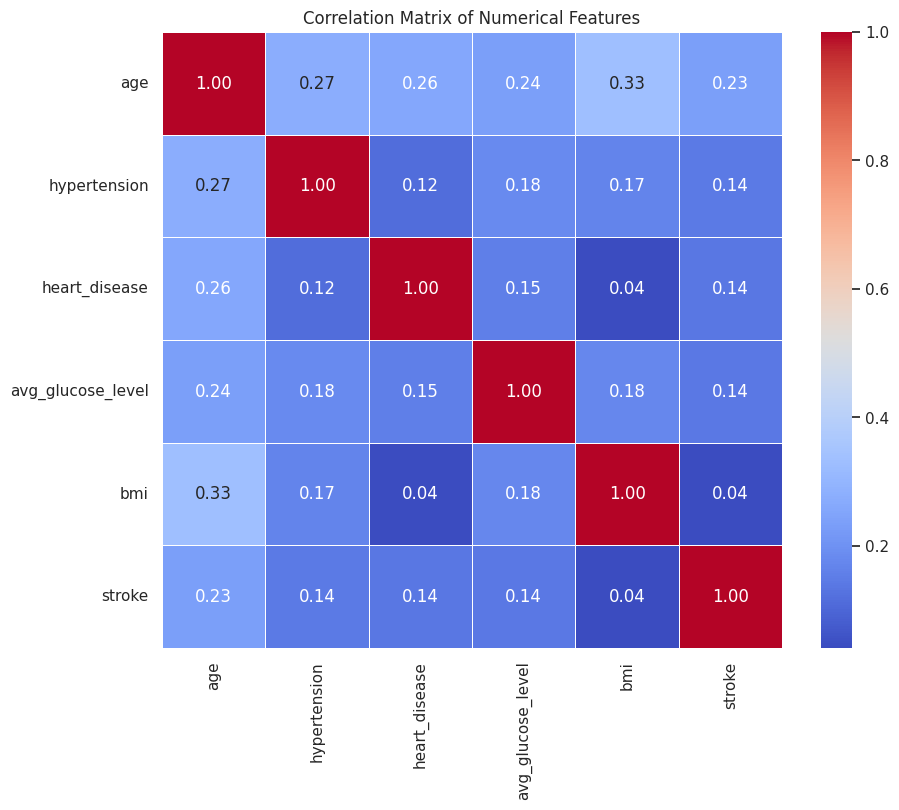

In [601]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# **3.0 Data Preparation and Preprocessing**

In [602]:
# Seperating input and output variables
x = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

In [603]:
# Seperate ordinal, categorical and numerical features
ord = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'residence_type']
cat = ['work_type', 'smoking_status']
cont = ['age', 'avg_glucose_level', 'bmi']

In [604]:
# Copy the input DataFrame to avoid modifying the original
x_encoded = x.copy()
# Initialize LabelEncoding
le = LabelEncoder()
# Apply label encoding to ordinal features
for col in ord:
    x_encoded[col] = le.fit_transform(x_encoded[col])

x_encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,children,0,103.08,18.6,Unknown
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked


In [605]:
# Apply one hot encoding to categorical features
x_encoded = pd.get_dummies(x_encoded, columns=cat)

x_encoded

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,False,False,True,False,False,False,True,False,False
2,1,80.0,0,1,1,0,105.92,32.5,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.4,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.0,False,False,False,True,False,False,False,True,False
5,1,81.0,0,0,1,1,186.21,29.0,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,False,False,False,False,True,True,False,False,False
5106,0,81.0,0,0,1,1,125.20,40.0,False,False,False,True,False,False,False,True,False
5107,0,35.0,0,0,1,0,82.99,30.6,False,False,False,True,False,False,False,True,False
5108,1,51.0,0,0,1,0,166.29,25.6,False,False,True,False,False,False,True,False,False


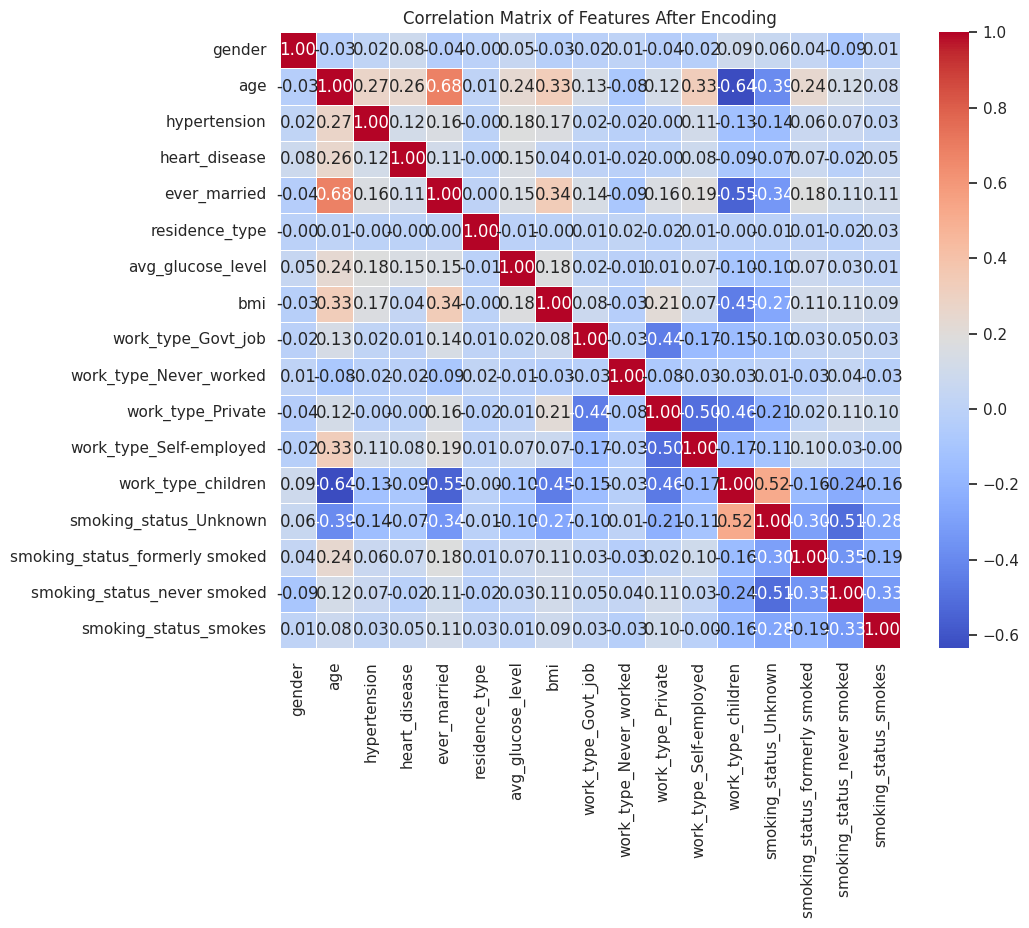

In [606]:
# Visualization of Correlation Matrix without Target Variable
correlation_matrix = x_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features After Encoding")
plt.show()

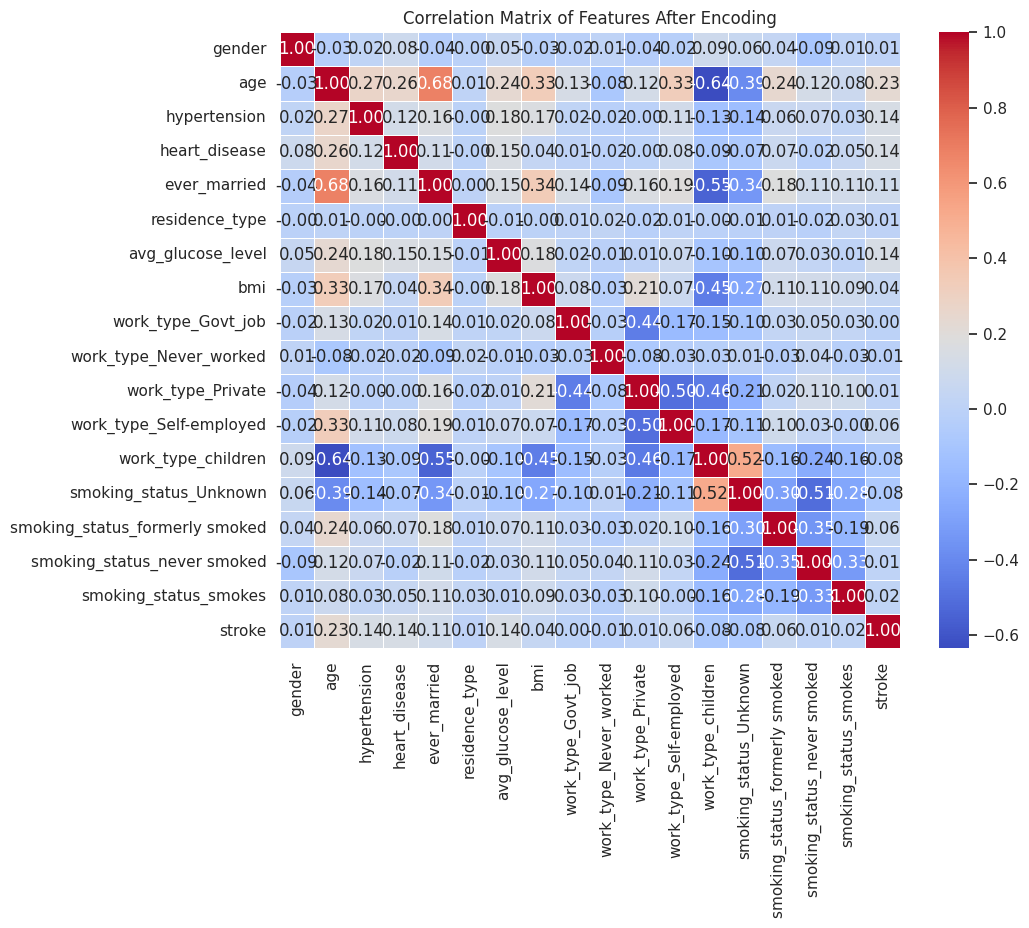

In [607]:
# Joining x and y together into 1 DataFrame
df_model = pd.concat([x_encoded, y], axis=1)
# Visualization of Correlation Matrix with Target Variable
correlation_matrix = df_model.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features After Encoding")
plt.show()

# **4.0	Data Splitting Strategy**

In [608]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y,
    test_size=0.5,         # 50% train, 50% test
    random_state=42        # ensures reproducibility
)

print("Training set:", x_train.shape, y_train.shape)
print("Test set    :", x_test.shape, y_test.shape)

# Confirm class balance is maintained
print("\nClass distribution in train set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set: (2454, 17) (2454,)
Test set    : (2454, 17) (2454,)

Class distribution in train set:
stroke
0    0.95762
1    0.04238
Name: proportion, dtype: float64

Class distribution in test set:
stroke
0    0.957213
1    0.042787
Name: proportion, dtype: float64


In [609]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4857,1,32.0,0,0,1,0,102.13,32.3,False,False,True,False,False,False,False,True,False
3709,0,42.0,0,0,0,1,84.03,31.4,False,False,True,False,False,False,False,True,False
964,1,66.0,1,0,1,0,74.90,32.1,False,False,True,False,False,False,False,True,False
2971,0,21.0,0,0,0,0,71.06,25.3,False,False,True,False,False,False,True,False,False
3262,1,47.0,0,0,1,0,88.49,22.2,False,False,True,False,False,False,False,False,True


# **5.0	AI Algorithm Techniques**

### **Balancing Data With SMOTE**

In [610]:
# Data is imbalanced, fix with SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to training data
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check target variable ratio
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())


Before SMOTE:
stroke
0    2350
1     104
Name: count, dtype: int64

After SMOTE:
stroke
0    2350
1    2350
Name: count, dtype: int64


### **Training The Models**

In [611]:
# Check size of x_test
print(x_test.shape)

(2454, 17)


In [612]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Scale data in pipeline, then split
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

# Fitting data into pipeline
rf_pipeline.fit(x_train_balanced, y_train_balanced)
logreg_pipeline.fit(x_train_balanced, y_train_balanced)

# Prediction Models
rf_pred = rf_pipeline.predict(x_test)
logreg_pred = logreg_pipeline.predict(x_test)

# Generate classification reports
rf_report = classification_report(y_test,rf_pred, target_names=["No Stroke", "Stroke"])
logreg_report = classification_report(y_test,logreg_pred, target_names=["No Stroke", "Stroke"])

## **Performance Analysis**

Random Forest Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.97      2349
      Stroke       0.14      0.05      0.07       105

    accuracy                           0.95      2454
   macro avg       0.55      0.52      0.52      2454
weighted avg       0.92      0.95      0.93      2454



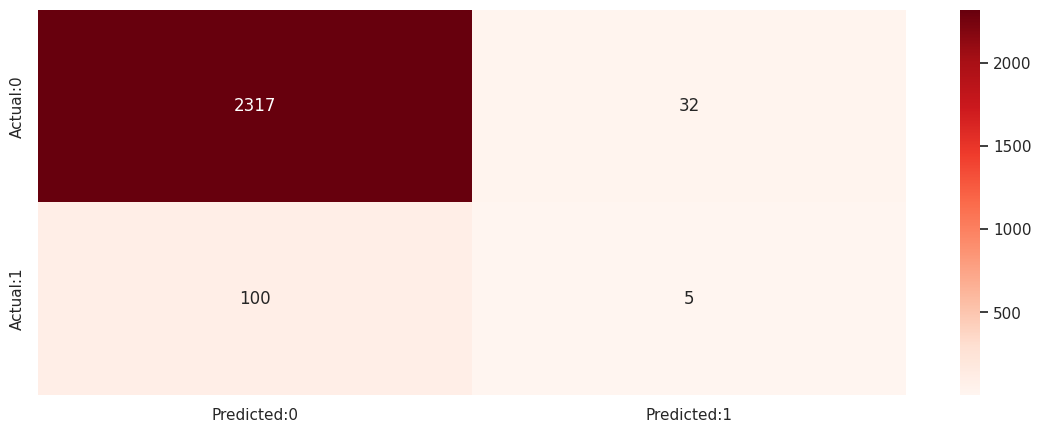

In [613]:
# Displaying Performance Reports
print("Random Forest Classification Report:")
print(rf_report)
cm = confusion_matrix(y_test,rf_pred)

plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");


Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.97      0.95      0.96      2349
      Stroke       0.19      0.25      0.22       105

    accuracy                           0.92      2454
   macro avg       0.58      0.60      0.59      2454
weighted avg       0.93      0.92      0.93      2454



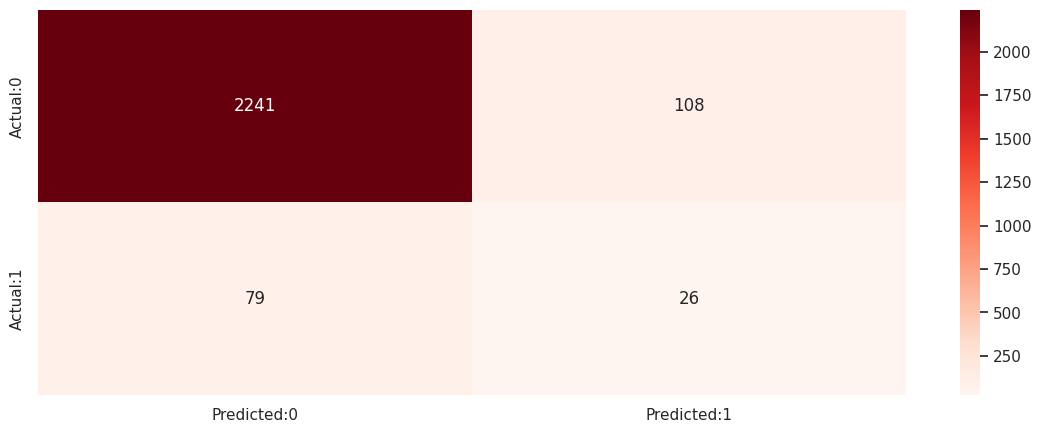

In [614]:
# Displaying Performance Reports
print("\nLogistic Regression Classification Report:")
print(logreg_report)
cm = confusion_matrix(y_test,logreg_pred)

plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

## **Hyperparameter Tuning with GridSearchCV**

### **RandomForestClassifier**

In [615]:
from sklearn.model_selection import GridSearchCV

In [616]:
# Finding Best Parameters
# n_estimators =[64,100,128,200]
# max_features = [2,3,5,7]
# bootstrap = [True,False]

# param_grid = {'n_estimators':n_estimators,
             #'max_features':max_features,
             #'bootstrap':bootstrap}

#rfc = RandomForestClassifier()
#grid = GridSearchCV(rfc,param_grid)
#grid.fit(x_train_balanced, y_train_balanced)
#grid.best_params_
#{'bootstrap': False, 'max_features': 2, 'n_estimators': 64}
#{'bootstrap': False, 'max_features': 3, 'n_estimators': 128}

Random Forest Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.97      2349
      Stroke       0.18      0.06      0.09       105

    accuracy                           0.95      2454
   macro avg       0.57      0.52      0.53      2454
weighted avg       0.93      0.95      0.94      2454



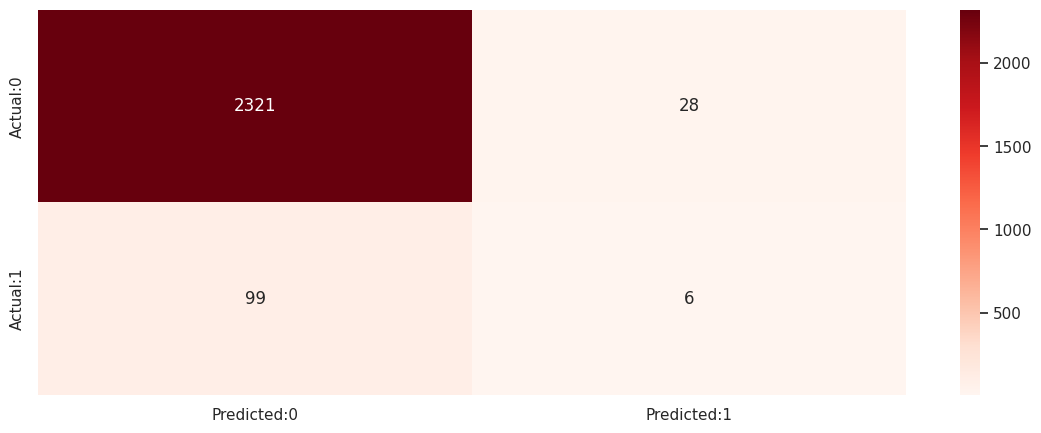

In [617]:
rfc = RandomForestClassifier(bootstrap=True, max_features=2, n_estimators=64)
rfc.fit(x_train_balanced, y_train_balanced)
rfc_tuned_pred = rfc.predict(x_test)
rfc_report = classification_report(y_test, rfc_tuned_pred, target_names=["No Stroke", "Stroke"])

# Displaying Performance Reports
print("Random Forest Classification Report:")
print(rfc_report)
cm = confusion_matrix(y_test,rfc_tuned_pred)

plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

### **LogisticRegression**

In [625]:
# Finding Best Parameters
# penalty = ['l1','l2']
# C = [0.001, 0.01, 0.1, 1, 10, 100]

# log_param_grid = {'penalty': penalty,
                  # 'C': C}

# logreg = LogisticRegression(max_iter=1000, solver='liblinear')
# grid = GridSearchCV(logreg, log_param_grid, cv=5, scoring='f1')
# grid.fit(x_train_balanced, y_train_balanced)
# grid.best_params_
# {'C': 10, 'penalty': 'l1'}

{'C': 10, 'penalty': 'l1'}


Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.97      0.95      0.96      2349
      Stroke       0.18      0.23      0.20       105

    accuracy                           0.92      2454
   macro avg       0.57      0.59      0.58      2454
weighted avg       0.93      0.92      0.93      2454



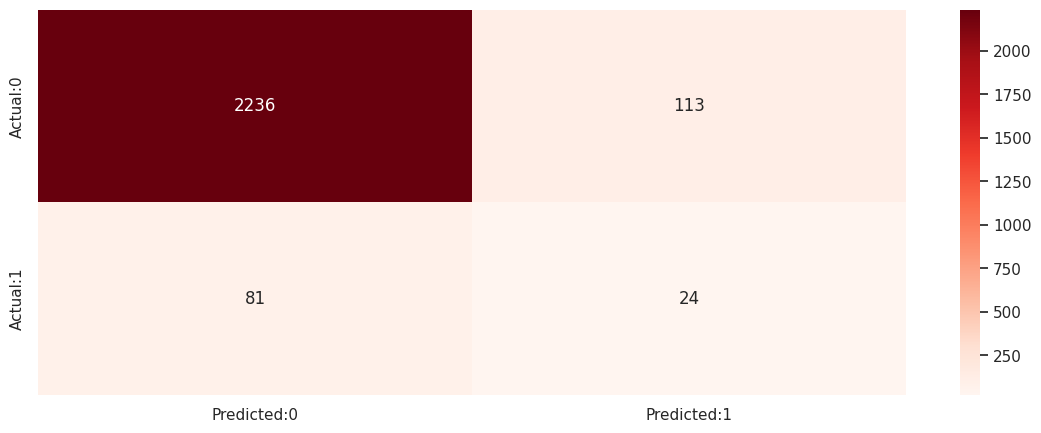

In [628]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=10,penalty='l1', solver='liblinear', random_state=42))])
logreg_pipeline.fit(x_train_balanced, y_train_balanced)
logreg_tuned_pred = logreg_pipeline.predict(x_test)
logreg_report = classification_report(y_test, logreg_tuned_pred, target_names=["No Stroke", "Stroke"])

# Displaying Performance Reports
print("\nLogistic Regression Classification Report:")
print(logreg_report)
cm = confusion_matrix(y_test,logreg_tuned_pred)
plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");